<a href="https://colab.research.google.com/github/xkzy/nlp_class_contest/blob/main/cmu-nlp-contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://github.com/xkzy/nlp_class_contest/releases/download/Dataset/input.txt
!wget -nc https://github.com/xkzy/nlp_class_contest/releases/download/Dataset/ans.txt
!wget -nc https://github.com/xkzy/nlp_class_contest/releases/download/Dataset/text_pairs.json
!wget -nc https://github.com/xkzy/nlp_class_contest/releases/download/keras_model/transformer_model_best_val.h5

File ‘input.txt’ already there; not retrieving.

File ‘ans.txt’ already there; not retrieving.

File ‘text_pairs.json’ already there; not retrieving.

File ‘transformer_model_best_val.h5’ already there; not retrieving.



In [ ]:
!pip install deepcut -q -q -q --exists-action i
!pip install pythainlp['full'] -q -q -q --exists-action i
!!pip install -q git+https://github.com/keras-team/keras-nlp.git --upgrade


['  Installing build dependencies ... \x1b[?25l\x1b[?25hdone',
 '  Getting requirements to build wheel ... \x1b[?25l\x1b[?25hdone',
 '  Preparing metadata (pyproject.toml) ... \x1b[?25l\x1b[?25hdone']

In [ ]:
import subprocess
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import csv
import numpy as np
import deepcut
from keras.models import Model, load_model
from keras.layers import Input, Dense
import keras_nlp
from tensorflow.keras.utils import to_categorical, set_random_seed
import matplotlib.pyplot as plt
from random import shuffle
import pathlib
import random
import string
import re
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
import pythainlp
import json
import os
from posixpath import split


set_random_seed(99)
random.seed(99)

Using TensorFlow backend


In [ ]:
try:
    subprocess.check_output('nvidia-smi')
    print('Nvidia GPU detected!')
except Exception: # this command not being found can raise quite a few different errors depending on the configuration
    print('No Nvidia GPU in system!')

Nvidia GPU detected!


In [ ]:
print(tf.__version__)
tf.test.is_gpu_available()
print(tf.config.list_physical_devices())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2.13.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
def sentence_loader(input_file):
    out=[]
    for i in list(input_file):
        s = i.split('::')[1].strip()
        s = ' '.join(pythainlp.word_tokenize(s,engine = 'deepcut'))
        out.append(s)
    return out

def answer_loader(ans_file):
    out=[]
    for i in ans_file:
        sl=i.split('::')[1].strip().split(',')
        pad = (' [pad]'*(3-len(sl)))
        s = '[start] '+' '.join(sl)+' [end]'+pad
        out.append(s)
        print(s)
    return out

def pair_gen(s,a):
    return list(zip(s,a))

In [ ]:
with open('input.txt', 'r',encoding = 'utf-8-sig') as input_file:
    input_data = sentence_loader(input_file)

3/3 [==============================] - 0s 6ms/step


In [ ]:
with open('ans.txt', 'r',encoding = 'utf-8-sig') as ans_file:
    ans_data = answer_loader(ans_file)

[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad] [pad]
[start] E [end] [pad

In [ ]:
text_pairs = []
if os.path.exists('text_pairs.json'):
    with open('text_pairs.json', 'rb') as fp:
        text_pairs = json.load(fp)
else:
    text_pairs = pair_gen(input_data,ans_data)
    with open("text_pairs.json", "w") as fp:
        json.dump(text_pairs, fp)
        print("Done writing JSON data into .json file")

print(len(text_pairs))
for _ in range(5):
    print(random.choice(text_pairs))

4818
['แม่ ตา มา หา   แล้ว ตา ก็ ลุก ไม่ ไหว', '[start] P P [end] [pad]']
['หลวงตาใส่ แว่น ตา สี ดำ แบรนด์ เนม คน นั้น แหละ ที่ ตก เป็น ข่าว อยู่ ตอน นี้', '[start] P E [end] [pad]']
['เพราะ อาการ สาย ตา ยาว ของ คุณ ตา จึง ทำ ให้ อ่าน หนังสือ ลำบาก', '[start] E P [end] [pad]']
['คง ต้อง ใช้ น้ำ ตา มากมาย เพื่อ ล้าง ตา   ไม่ ให้ เหลือ ภาพ เธอ ให้ จำ', '[start] E E [end] [pad]']
['ตา เป็น สามี ของ ยาย', '[start] P [end] [pad] [pad]']


In [ ]:
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples :]

print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")

4818 total pairs
3374 training pairs
722 validation pairs
722 test pairs


In [ ]:
strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

vocab_input_size = 5000
vocab_ans_size = 8
sequence_length = 100
sequence_ans_length = 5
batch_size = 64


def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")


input_vectorization = TextVectorization(
    max_tokens=vocab_input_size,
    # output_mode="tf_idf",
    output_mode="int",
    output_sequence_length=sequence_length,
    split='whitespace',
)
ans_vectorization = TextVectorization(
    max_tokens=vocab_ans_size,
    output_mode="int",
    output_sequence_length=sequence_ans_length + 1,
    standardize=custom_standardization,
    split='whitespace',
)
train_input_texts = [pair[0] for pair in train_pairs]
train_ans_texts = [pair[1] for pair in train_pairs]
input_vectorization.adapt(train_input_texts)
ans_vectorization.adapt(train_ans_texts)

In [ ]:
len(input_vectorization.get_vocabulary())

3490

In [ ]:
ans_vectorization.get_vocabulary()

['', '[UNK]', '[pad]', '[start]', '[end]', 'e', 'p', 't']

In [ ]:
def format_dataset(input, ans):
    input = input_vectorization(input)
    ans = ans_vectorization(ans)
    return (
        {
            "encoder_inputs": input,
            "decoder_inputs": ans[:, :-1],
        },
        ans[:, 1:],
    )


def make_dataset(pairs):
    input_texts, ans_texts = zip(*pairs)
    input_texts = list(input_texts)
    ans_texts = list(ans_texts)
    dataset = tf.data.Dataset.from_tensor_slices((input_texts, ans_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()


train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)
test_ds = make_dataset(test_pairs)

In [ ]:
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 100)
inputs["decoder_inputs"].shape: (64, 5)
targets.shape: (64, 5)


In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(dense_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        attention_output = self.attention(query=inputs, value=inputs, key=inputs)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "dense_dim": self.dense_dim,
                "num_heads": self.num_heads,
            }
        )
        return config


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "sequence_length": self.sequence_length,
                "vocab_size": self.vocab_size,
                "embed_dim": self.embed_dim,
            }
        )
        return config


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(latent_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.add = layers.Add()  # instead of `+` to preserve mask
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, use_causal_mask=True
        )
        out_1 = self.layernorm_1(self.add([inputs, attention_output_1]))

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
        )
        out_2 = self.layernorm_2(self.add([out_1, attention_output_2]))

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(self.add([out_2, proj_output]))


    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "latent_dim": self.latent_dim,
                "num_heads": self.num_heads,
            }
        )
        return config

In [ ]:
embed_dim = 300
latent_dim = 2048
num_heads = 16
num_en_transformer_blocks = 1
num_de_transformer_blocks = 1

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_input_size, embed_dim)(encoder_inputs)
for _ in range(num_en_transformer_blocks):
    x = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)

encoder_outputs = x
encoder = keras.Model(encoder_inputs, encoder_outputs,name="encoder")

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_ans_length, vocab_input_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
for _ in range(num_de_transformer_blocks-1):
    x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x,x)
    x = layers.Dropout(0)(x)
decoder_outputs = layers.Dense(vocab_ans_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs, name="decoder")

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)

In [ ]:
decoder.summary()

Model: "decoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 positional_embedding_1 (Po  (None, None, 300)            1501500   ['decoder_inputs[0][0]']      
 sitionalEmbedding)                                                                               
                                                                                                  
 decoder_state_inputs (Inpu  [(None, None, 300)]          0         []                            
 tLayer)                                                                                    

In [ ]:
checkpoint = ModelCheckpoint('transformer_model_best_val.h5', #อย่าลืมเปลี่ยน path ให้ file
                             verbose=1,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

transformer.summary()
transformer.compile(
    "rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 positional_embedding (Posi  (None, None, 300)            1530000   ['encoder_inputs[0][0]']      
 tionalEmbedding)                                                                                 
                                                                                                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                      

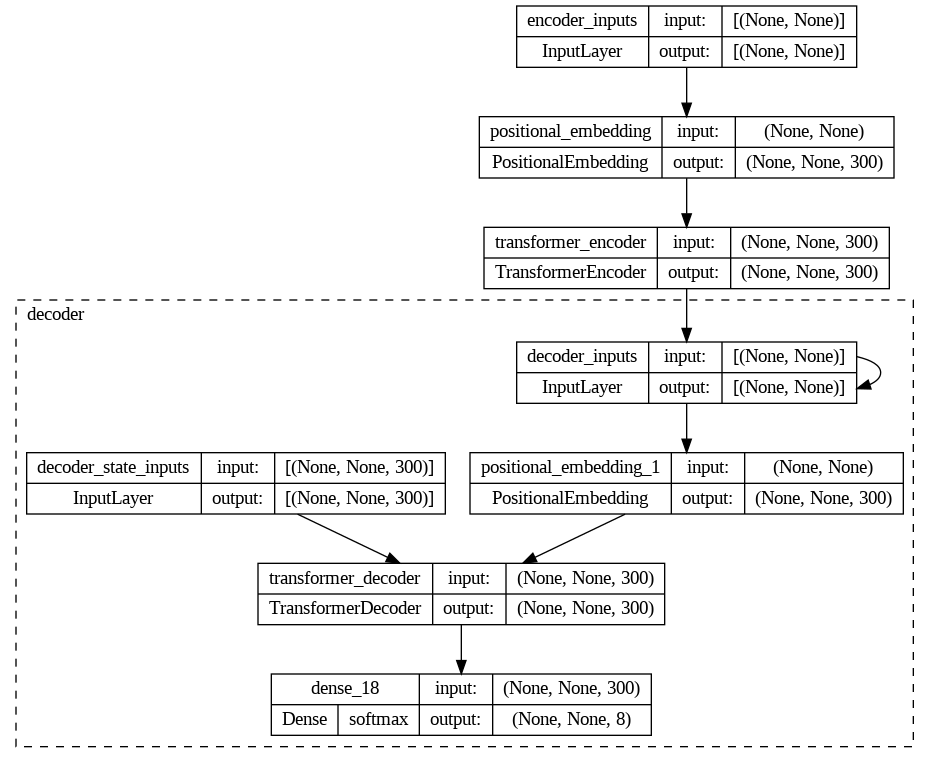

In [ ]:
tf.keras.utils.plot_model(transformer,
                          to_file='transformer.png',
                          show_shapes=True,
                          expand_nested=True,
                          show_layer_names=True,
                          show_layer_activations=True,
                          show_trainable=False)

In [ ]:
force_train = True
epochs = 300  # This should be at least 30 for convergence
if not os.path.exists('transformer_model_best_val.h5') or force_train:
    transformer.fit(train_ds, epochs=epochs, validation_data=val_ds,callbacks=[checkpoint])

Epoch 1/300
53/53 [==============================] - ETA: 0s - loss: 0.7326 - accuracy: 0.8475
Epoch 1: val_accuracy did not improve from 0.89609
53/53 [==============================] - 31s 479ms/step - loss: 0.7326 - accuracy: 0.8475 - val_loss: 0.5181 - val_accuracy: 0.8232
Epoch 2/300
53/53 [==============================] - ETA: 0s - loss: 0.2316 - accuracy: 0.9200
Epoch 2: val_accuracy did not improve from 0.89609
53/53 [==============================] - 25s 479ms/step - loss: 0.2316 - accuracy: 0.9200 - val_loss: 0.3466 - val_accuracy: 0.8831
Epoch 3/300
53/53 [==============================] - ETA: 0s - loss: 0.1670 - accuracy: 0.9408
Epoch 3: val_accuracy did not improve from 0.89609
53/53 [==============================] - 25s 480ms/step - loss: 0.1670 - accuracy: 0.9408 - val_loss: 0.3749 - val_accuracy: 0.8928
Epoch 4/300
53/53 [==============================] - ETA: 0s - loss: 0.1606 - accuracy: 0.9449
Epoch 4: val_accuracy did not improve from 0.89609
53/53 [=============

In [ ]:
transformer = load_model('transformer_model_best_val.h5',custom_objects={
    'PositionalEmbedding': PositionalEmbedding,
    'TransformerDecoder': TransformerDecoder,
    'TransformerEncoder': TransformerEncoder,})

ans_vocab = ans_vectorization.get_vocabulary()
ans_index_lookup = dict(zip(range(len(ans_vocab)), ans_vocab))
max_decoded_sentence_length = sequence_ans_length


def decode_sequence(input_sentence):
    tokenized_input_sentence = input_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = ans_vectorization([decoded_sentence])[:, :-1]
        predictions = transformer([tokenized_input_sentence, tokenized_target_sentence])
        # print(predictions)
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = ans_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "[end]":
            break
        # else:
        #     decoded_sentence += " " + sampled_token
    # return decoded_sentence[8:].strip().upper().replace(' ',',')
    return decoded_sentence.replace(" ", ",").replace("[start]", "").replace("[end]", "").upper().strip().strip(',')


In [ ]:
test_input_texts = [pair[0] for pair in test_pairs]
test_ans_texts = [pair[1] for pair in test_pairs]

for _ in range(30):
    input_sentence,ans = random.choice(test_pairs)
    print(input_sentence)
    translated = decode_sequence(input_sentence)
    print(translated.replace(",", ""))
    print(ans.replace(" ", "").replace("[pad]", "").replace("[start]", "").replace("[end]", "").upper().strip().strip(','))

อวัยวะ ที่ ใช้ มอง สิ่ง ต่างๆ คือ ตา
E
E
ถ้า ตาย แต่ ทำ ความ ดีเยอะ จะ ได้ ขึ้น สวรรค์   ตา เคย บอก ไว้
P
P
ตา ของ เรา ไม่ โดน ความ ร้อน สูง
P
E
ตา นี้ ช่าง มัน ตาหน้า เอา ใหม่
TT
TT
ถึง ตา นี้ พวก เรา จะ พ่ายแพ้   แต่ ตา หน้า   ก็ แพ้ เหมือน เดิม
TT
TT
แม่ บอก ได้ แค่ ตาเดียว นะ
T
T
ตา นี้ อีซี่ จัด   ๆ   กิน นิ่ม เลย
P
T
ตา เป็น ผู้ ชาย
P
P
ตา นี้ เกม เร็ว ไม่ นับ !   ตาหน้า เกม เร็ว อีก ก็ ไม่ นับ เช่น กัน !
TT
TT
ตา นี้ ไม่ ไหว ละรอ ตา มา ก่อน ค่อย เล่น ดี กว่า
PP
TP
นัด คิว หมอ รักษา ตา ให้ แม่ วัน พุธ นี้ หน่อย สิ
E
E
ตาลอย   ๆ   นะ เรา
P
E
ตาม ที่ เขา กล่าว มา   เขา เสีย ดวง ตา เพราะ คู่ อริ ทำร้าย เขา
E
E
บอก อีก ตา ตลอด เมื่อ ไหร่ จะ ได้ เล่น สัก ที
T
T
ตาโย่ง ร้อง เพลง จน ตาลือ ด่า
P
PP
คน เรา ไม่ ควร ขยี้ ดวง ตา แรง ๆ   จะ ทำ ให้ ตา แดง
E
EE
ตา นี้ ไม่ ไหว ละรอ ตา มา ก่อน ค่อย เล่น ดี กว่า
PP
TP
พ่อ ชอบ มาหา ตา ฉัน บ่อย ๆ พร้อม กับ เหล้า
P
P
เขา จ้อง ผู้ หญิง คน นั้น จน ลูก ตา จะ ถลน ออก มา
E
E
คน แก่ ตา ดำ ๆ คือ ตา ของ เขา
P
EP
ตอน นี้ ฉัน รู้สึก ง่วง จน ตา จะ ปิด
E
E
คน ที

In [ ]:
transformer.evaluate(test_ds, verbose=1)

12/12 [==============================] - 3s 155ms/step - loss: 0.3113 - accuracy: 0.8997


[0.3112967610359192, 0.8996952176094055]

In [ ]:
def file_pred(inpfile,ansfile="my_ans.txt",writeout=True):
    out=[]
    with open(inpfile, 'r',encoding = 'utf-8-sig') as i_file:
        for i in list(i_file):
            c=0
            i_s=i.split('::')
            s = i_s[1].strip()
            token=pythainlp.word_tokenize(s,engine = 'deepcut')
            for k in token:
                if 'ตา' in k:
                    c+=1
            s = ' '.join(token)
            a=decode_sequence(s)
            al=a.split(',')
            if len(al)>c:
                al=al[:c]
                print('trimed output length')
            a=','.join(al)
            out.append(i_s[0]+'::'+a)
    if writeout:
        with open(ansfile, 'w', encoding='utf-8-sig') as o_file:
            o_file.write('\n'.join(out))
    return out

In [ ]:
t=file_pred('input_k.txt','ans_k.txt')
print(t)

1/1 [==============================] - 0s 21ms/step
['1::E,E', '2::T,T', '3::P,E,P', '4::P,E,P', '5::P,E', '6::P,E', '7::E', '8::P', '9::P', '10::E', '11::E', '12::E', '13::E', '14::E', '15::E', '16::P', '17::P', '18::P', '19::P', '20::P', '21::P', '22::P', '23::P,T,P', '24::P,T,P', '25::P,P', '26::T,T', '27::T,T', '28::T', '29::P,P', '30::P,E']
